# WSI ćwiczenie 6
## QLearning

Mikołaj Wewiór
318407

In [14]:
# import main_parallel
# results = main_parallel.main()

In [15]:
import main
import numpy as np
import matplotlib.pyplot as plt
from QLearning import QL

In [16]:
stats = []

In [17]:
seeds = [318407, 4062024, 19122020, 27112002, 99815612]

In [18]:
all_results = []

for s in seeds:
    print(f"\n{s}")
    Q = QL(
        map_shape=(64, 4),
        learning_rate=0.1,
        discount=0.95,
        policy="Eps-greedy",  # Eps-greedy | Boltzman
        eps=0.95,
        T=1,
    )
    result = main.main(seed=s, Q=Q)
    all_results.append(result)
    print(result["moves"][-100::])

# all_results


318407
['D', 'D', 85, '_', 'D', 64, '_', 45, '_', 68, 'D', '_', 'D', '_', 36, 'D', 89, 48, 'D', 50, 41, 'D', '_', 45, 48, 'D', 73, 66, 'D', '_', 57, 65, '_', 92, 23, 91, 'D', 69, '_', 85, 'D', '_', 46, 46, 56, 'D', 50, 65, 45, 'D', 88, 71, 43, 64, 48, '_', 98, 86, 41, 75, 64, 68, 48, 30, 60, 58, '_', '_', 44, 66, 71, 'D', 83, 50, 22, 88, '_', 'D', 'D', 'D', 'D', 28, 29, 43, '_', 60, 'D', 61, 83, 38, 33, 77, '_', 'D', 87, 91, 58, 48, 'D', 61]

4062024
[67, 'D', 44, 70, 62, 29, 'D', 57, 'D', 'D', 'D', 'D', 90, 48, 54, 69, 55, 'D', 'D', 93, 50, '_', 75, 'D', 'D', 48, 'D', 72, 71, '_', 'D', '_', 78, 'D', 'D', 99, '_', 47, 50, 81, 46, 64, '_', 77, 'D', 'D', '_', 54, 'D', 57, 89, 'D', 96, 43, '_', 59, 29, 'D', 36, 64, 30, 92, 'D', 31, 67, 63, 'D', 24, 43, 48, 'D', 66, 'D', 38, 'D', 49, '_', '_', 53, '_', 61, 'D', 80, 43, 73, 'D', 57, 'D', 51, 64, 39, '_', '_', 75, 25, 48, 'D', 63, 78, '_']

19122020
[93, 51, 94, 86, 55, 'D', 77, 76, '_', 55, 'D', 'D', 81, 97, 36, '_', 35, 93, 28, 44, 94, 40

In [19]:
all_rewards_count = []

last_moves = []
last_moves_achived = []
reward_moves_count = []

for elem in all_results:

    rewards = elem["rewards"]
    all_rewards_count.append(rewards)

    moves = elem["moves_learn"]  # [-100::]
    last_moves.append([])
    last_moves_achived.append([])
    for m in moves:
        if type(m) is int:
            reward_moves_count.append(m)
            last_moves[-1].append(m)
            last_moves_achived[-1].append(m)
        else:
            last_moves[-1].append(0)

percentage_average_won = np.mean(all_rewards_count) / int(1e4)

percentage_average_moves = len(reward_moves_count) / 500
average_moves = np.mean(reward_moves_count)
std_moves = np.std(reward_moves_count)

stats.append({
    "alpha": all_results[0]["alpha"],
    "gamma": all_results[0]["gamma"],
    "epsilon": all_results[0]["epsilon"],
    "procentowe_osiagniecie_celu": percentage_average_won,
    "procentowe_os._celu_100_ostatnich": percentage_average_moves,
    "średnia_liczba_ruchów": average_moves,
    "odchylenie_liczby ruchów": std_moves
})

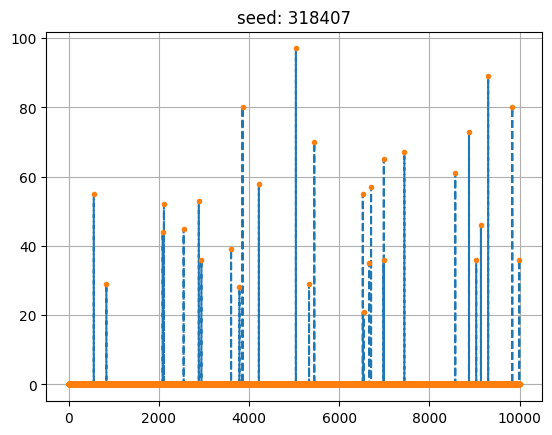

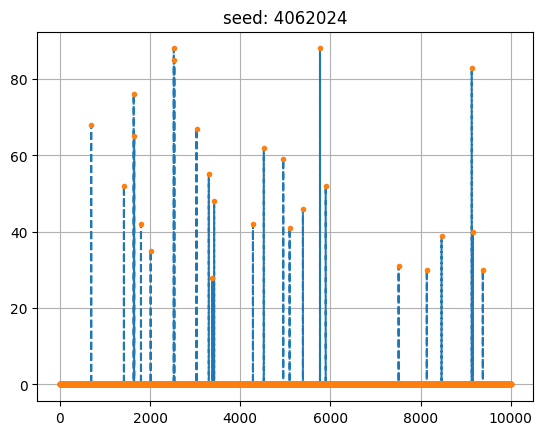

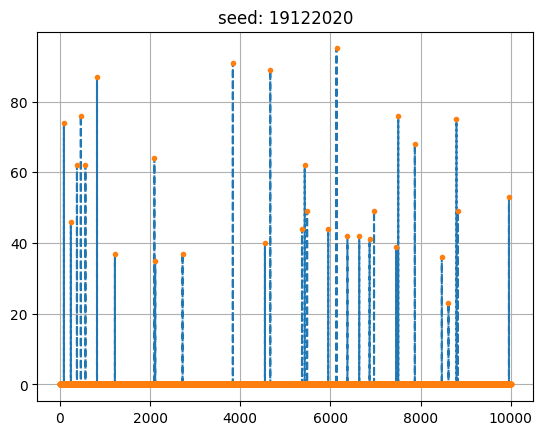

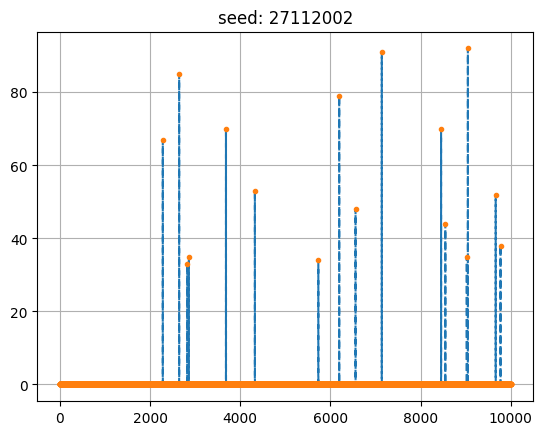

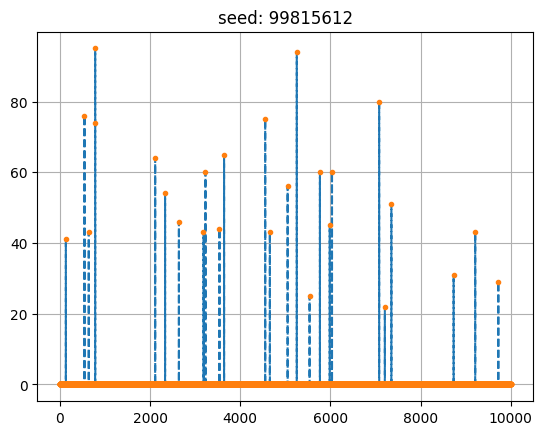

In [20]:
xdata = list(range(1, len(last_moves[0])+1))

for seed_moves, seed in zip(last_moves, seeds):
    plt.figure()
    plt.grid(True)
    ydata = seed_moves
    plt.plot(xdata, ydata, '--')
    plt.plot(xdata, ydata, '.')
    plt.title(f"seed: {seed}")

In [21]:
# stats.insert(0, base_stat)